INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['2m_temperature']   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 0.009999999776482582 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃ awi                  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 51134.0              ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━┛

METRICS:
lat_weighted_mse_val
╭──────────────────────────────┬──────────╮
│ w_mse_2m_temperature_1_hours │ 0.453085 │
├──────────────────────────────┼──────────┤
│ w_mse                        │ 0.453085 │
╰──────────────────────────────┴──────────╯
lat_weighted_rmse
╭───────────────────────────────┬────────╮
│ w_rmse_2m_temperature_1_hours │ 14.428 │
├───────────────────────────────┼────────┤
│ w_rmse                        │ 14.428 │
╰───────────────────────────────┴────────╯
lat_weighted_acc
╭────────

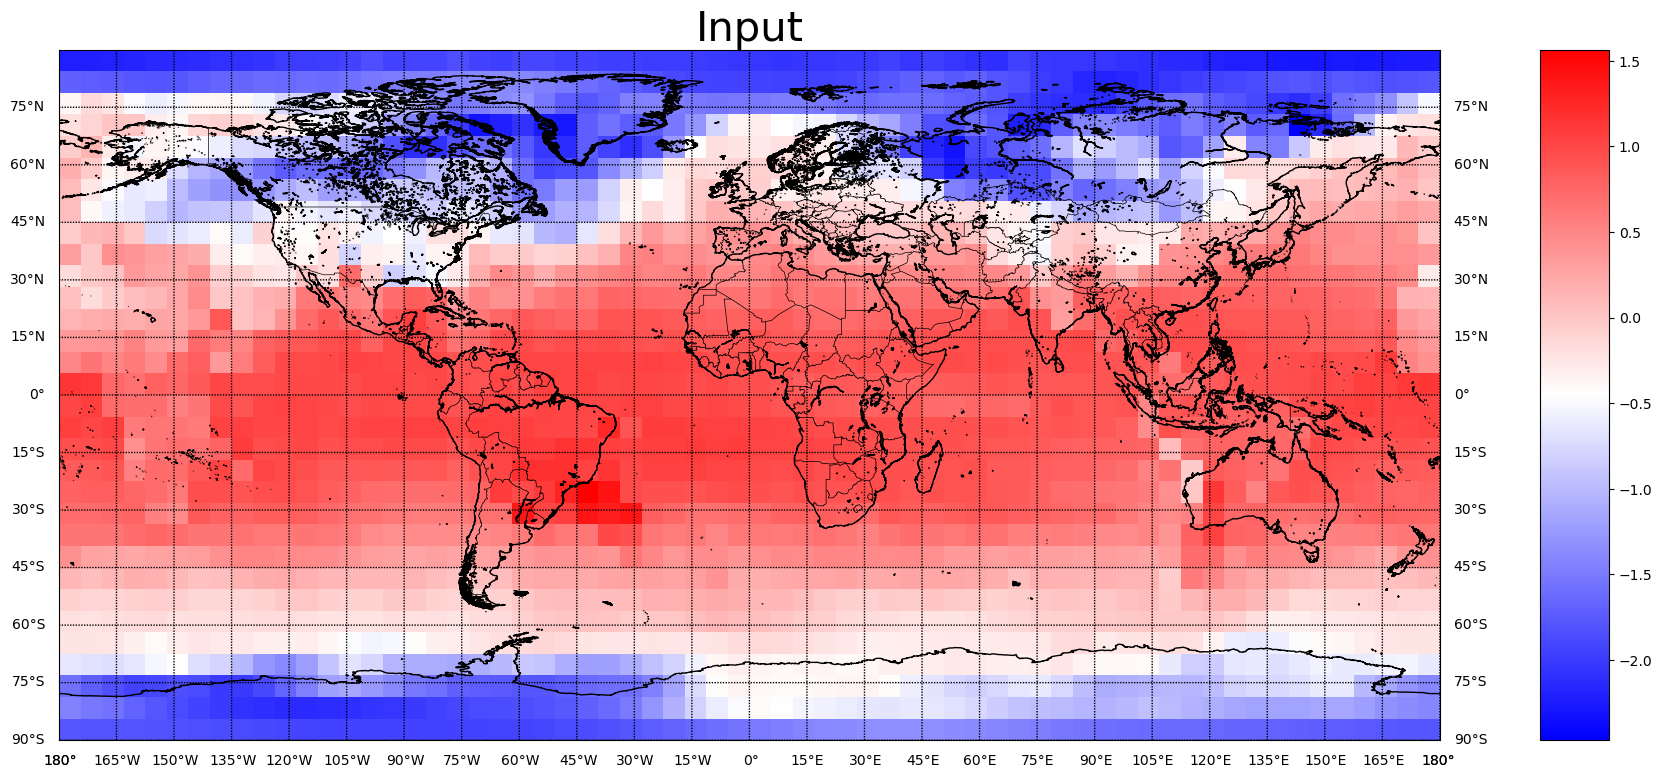

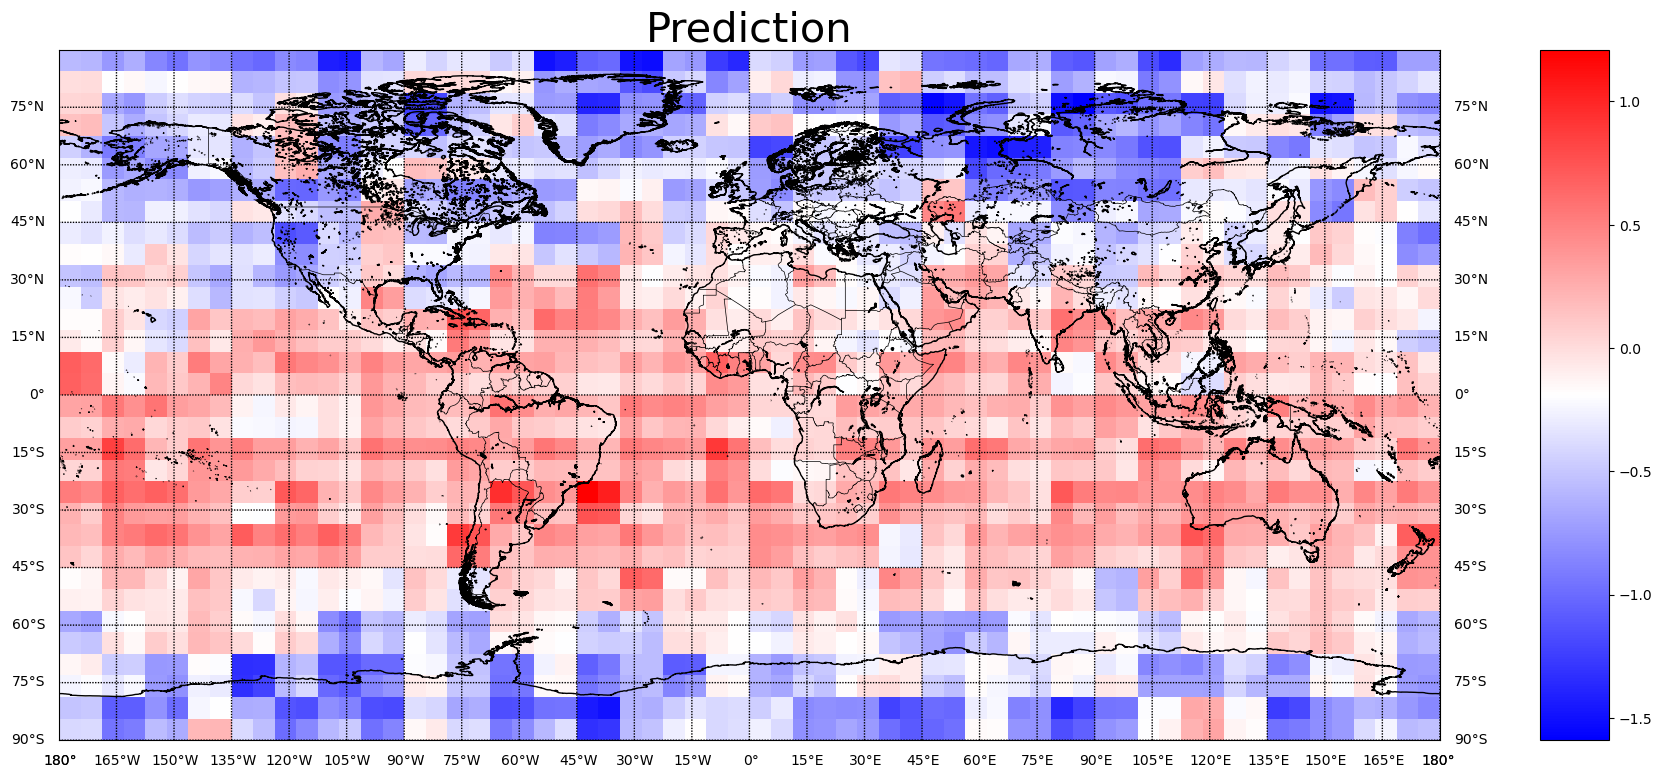

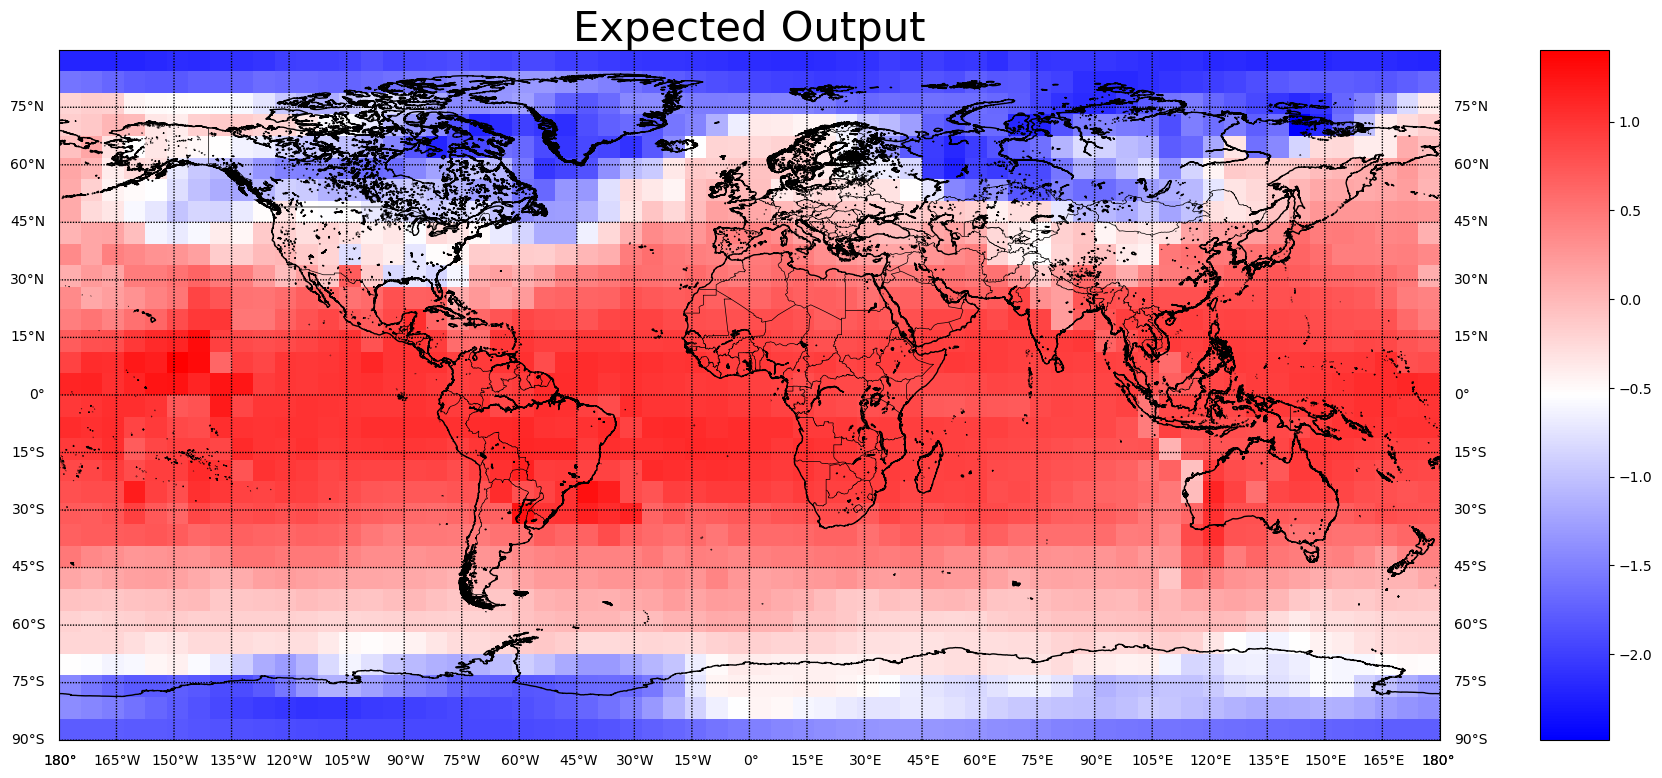

In [3]:
import matplotlib.pyplot as plt
import json
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


def plot(data, title):
        temperature = data
        fig = plt.figure(figsize=(20,9))
        map = Basemap(projection='cyl', resolution = 'i', area_thresh = 0.3, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90.0, anchor = 'SW')
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-90,90,15.0),labels=[1,1,0,1])
        map.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1])

        # temperature2 = upscale(temperature, fig)
        heatmap = plt.pcolormesh(
            np.linspace(-180, 180, num = temperature.shape[1]+1),
            np.linspace(-90, 90, num = temperature.shape[0]+1),
            temperature, 
            cmap='bwr',
            shading='flat'
        )
        # heatmap = plt.pcolormesh(
        #     np.linspace(-180, 180, num = temperature.shape[1]),
        #     np.linspace(-90, 90, num = temperature.shape[0]),
        #     temperature, 
        #     cmap='bwr',
        #     shading='nearest'
        # )
        map.colorbar(heatmap, pad=1)
        plt.title(title, 
            {
                'fontsize' : 30
            }
        )
        fig.show()

def report(data, i):
    data = data[i]
    output = np.array(data['output']).squeeze()
    input = np.array(data['input']).squeeze()
    prediction = np.array(data['prediction']).squeeze()

    print('INFO:')
    table = [
        ['input variables', data['variables']],
        ['output variables', data['out_variables']],
        ['lead time', data['lead_times']],
        ['climate model', data['climate_model_init']],
        ['days since 1850', data['days_since_1850']],
    ]
    print(tabulate(table, tablefmt = "heavy_grid"))
    print()
    print('METRICS:')
    for i in data['metrics']:
        print(i)
        print(tabulate([[j, data['metrics'][i][j]] for j in data['metrics'][i]], tablefmt = "rounded_grid"))

    plot(input, 'Input')
    plot(prediction, 'Prediction')
    plot(output, 'Expected Output')
    print()

with open(r'/home/prateiksinha/ClimaX/temp_files/final_json_1692824009.915974.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0)

In [ ]:
# y = np.vstack([np.linspace(0,360,temperature2.shape[0]).transpose()]*temperature2.shape[1])
# x = np.vstack([np.linspace(-90,90,temperature2.shape[1])]*temperature2.shape[0]).transpose()

# def upscale(temperature, fig):
#     temp_y, temp_x = temperature.shape
#     map_x, map_y = tuple(fig.get_size_inches() * fig.dpi)
#     # map_x, map_y = 360, 180
#     up_x = int(temp_x * (1 + map_x//temp_x))
#     up_y = int(temp_y * (1 + map_y//temp_y))
#     # print((up_x) // temp_x)
#     output = np.zeros((int(up_x), int(up_y)))
#     # print(temp_x, temp_y)
#     # print(up_x, up_y)
#     for i in range(up_x):
#         for j in range(up_y):
#             # print(i / up_x)
#             output[i,j] = temperature[int(i//temp_x), int(j//temp_y)]
#     return output

TypeError: 'Basemap' object is not iterable

<Figure size 2000x900 with 0 Axes>

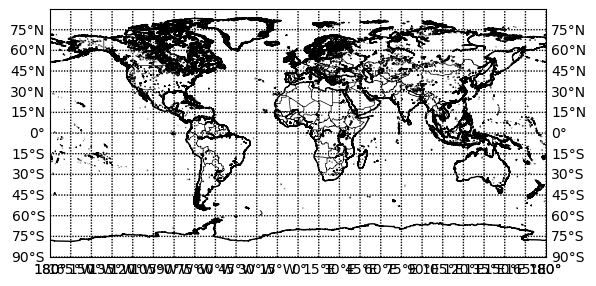

In [12]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(20,9))
fig, ax = plt.subplots()

def init():
    map = Basemap(projection='cyl', resolution = 'i', area_thresh = 0.3, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90.0, anchor = 'SW')
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-90,90,15.0),labels=[1,1,0,1])
    map.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1])

    # plt.title("prediction", 
    #     {
    #         'fontsize' : 30
    #     }
    # )
    return map

def animate(i):
    temperature = data1[i]['prediction']
    heatmap = plt.pcolormesh(
        np.linspace(-180, 180, num = temperature.shape[1]+1),
        np.linspace(-90, 90, num = temperature.shape[0]+1),
        temperature, 
        cmap='bwr',
        shading='flat'
    )
    return fig

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1, 
                               blit=True)

In [ ]:
HTML(anim.to_jshtml())